# Solution for Exercise 6: Molecular Dynamics

----

We first have to import numpy and matplotlib:

In [1]:
import numpy as np
from matplotlib import pyplot as plt 

Next, we need to define the parameters of the simulation:

In [2]:
N = 100    # Number of integration steps
k = 0.03   # force constant
m = 1.0    # mass of the particle
dt = 1.0   # integration time step

----
## 1) Euler algorithm:

Initialize the arrays to store the positions $x$ and velocities $v$ of all timesteps:

In [3]:
x= np.zeros(N)   
v= np.zeros(N)

Now, set the initial conditions:

In [4]:
x[0]= -1
v[0]= 0.2

We calculate the individual timesteps in a *for*-loop:

In [5]:
for i in range(N-1):
    
  # new position:
    x[i+1]= x[i] + dt * v[i]
    
  # new force and velocity 
    F = -k * x[i]
    v[i+1]= v[i] + dt * F/m

----
## 2) Verlet algorithm

Define variables for Verlet positions $vx$ and velocities $vv$ as before:

In [6]:
vx= np.zeros(N)
vv= np.zeros(N)

Set initial conditions as before:

In [7]:
vx[0] = -1
vv[0] = 0.2

The first step is special and is calculated separately:

In [8]:
F= -k * vx[0];
vx[1] = vx[0] + dt * vv[0] + F / (2 * m) * dt**2

All remaining timesteps can be calculated again in a *for*-loop:

In [9]:
for i in range(1,N-1):
    # force:
    F= -k * vx[i]

    # position:
    vx[i+1]= 2 * vx[i] - vx[i-1] + F/m * dt**2

    # velocity:
    vv[i]= (vx[i+1] - vx[i-1]) / ( 2 * dt )

----
## 3) Analytical solution

$ x(t)= A*cos(wt) + B*sin(wt) $

Define empty array again for positions:

In [10]:
ax = np.zeros(N)

Set amplitudes and frequency from initial conditions:

In [11]:
w = np.sqrt(k/m)
A = x[0]
B = v[0] / w

Calculate analytical solution:

In [12]:
for i in range(N):
    ax[i]= A * np.cos(w * dt * i) + B * np.sin(w * dt * i)

----
## 4) Plot and compare the solutions

For this, we first need an array for the timepoints $t$ to plot against:

In [13]:
t = np.arange(N) * dt

Use matplotlib to plot all three curves in one axis:

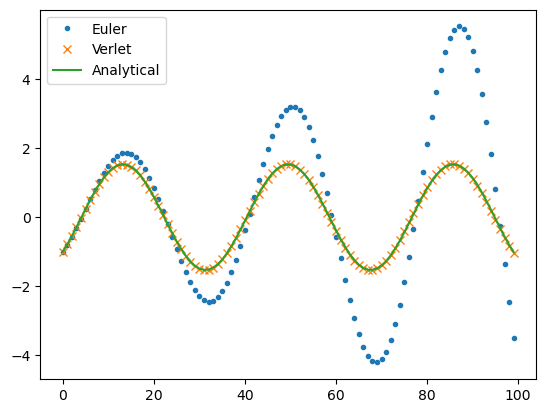

In [14]:
plt.plot(t, x, '.')
plt.plot(t, vx, 'x')
plt.plot(t, ax,'-')
plt.legend(['Euler', 'Verlet', 'Analytical'])
plt.show()